In [1013]:
import tensorflow as tf
import cv2,os
import matplotlib.pyplot as plt
import numpy as np

In [1014]:
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,Dropout,MaxPool2D
from tensorflow.keras.models import Model   

In [1015]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x
def ResNet34(shape = (259, 100, 1), classes = 2):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)    
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [1016]:
def base_model(inputs):
    
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(inputs)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=MaxPool2D()(x)   
    Dropout(0.1)(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=MaxPool2D()(x)
    # Dropout(0.1)(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=MaxPool2D()(x)
    Dropout(0.1)(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=MaxPool2D()(x)
    # Dropout(0.2)(x)
    # x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    # x=tf.keras.layers.BatchNormalization()(x)
    # x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    # x=tf.keras.layers.BatchNormalization()(x)
    # x=tf.keras.layers.Conv2D(2,3,activation="relu")(x)
    # x=tf.keras.layers.BatchNormalization()(x)
    # x=MaxPool2D()(x)
     
        
    x = Flatten()(x)
    x =Dense(32,activation="relu")(x)
    # Dropout(0.2)(x)
    x =Dense(32,activation="relu")(x)
    # x =Dense(128,activation="relu")(x)
    # x =Dense(128,activation="relu")(x)
    return x

In [1017]:
def final_model(inputs):
    x = base_model(inputs)
    x=Dense(2,activation="softmax")(x)
    model=Model(inputs,x)
    return model

In [1018]:
#preparing images
yes=[]
no=[]
max_len=0
for file in os.listdir("./VISION/yes"):
    img=cv2.imread(f"./VISION/yes/{file}",0)
    if max_len<np.shape(img)[0]:
        max_len = np.shape(img)[0]
    yes.append(img)
for file in os.listdir("./VISION/no"):
    img=cv2.imread(f"./VISION/no/{file}",0)
    if max_len<np.shape(img)[0]:
        max_len = np.shape(img)[0]
    no.append(img)
train_images=[]
for img in yes:
    bordersize = max_len-np.shape(img)[0]
    img = cv2.copyMakeBorder(
        img,
        top=bordersize,
        bottom=0,
        left=0,
        right=0,
        borderType=cv2.BORDER_CONSTANT
    )
    train_images.append(img)
for img in no:
    bordersize = max_len-np.shape(img)[0]
    img = cv2.copyMakeBorder(
        img,
        top=bordersize,
        bottom=0,
        left=0,
        right=0,
        borderType=cv2.BORDER_CONSTANT
    )
    train_images.append(img)
train_labels=len(yes)*[1]
train_labels.extend(len(no)*[0])
train_images=(tf.convert_to_tensor(train_images))
train_labels=tf.constant(train_labels)


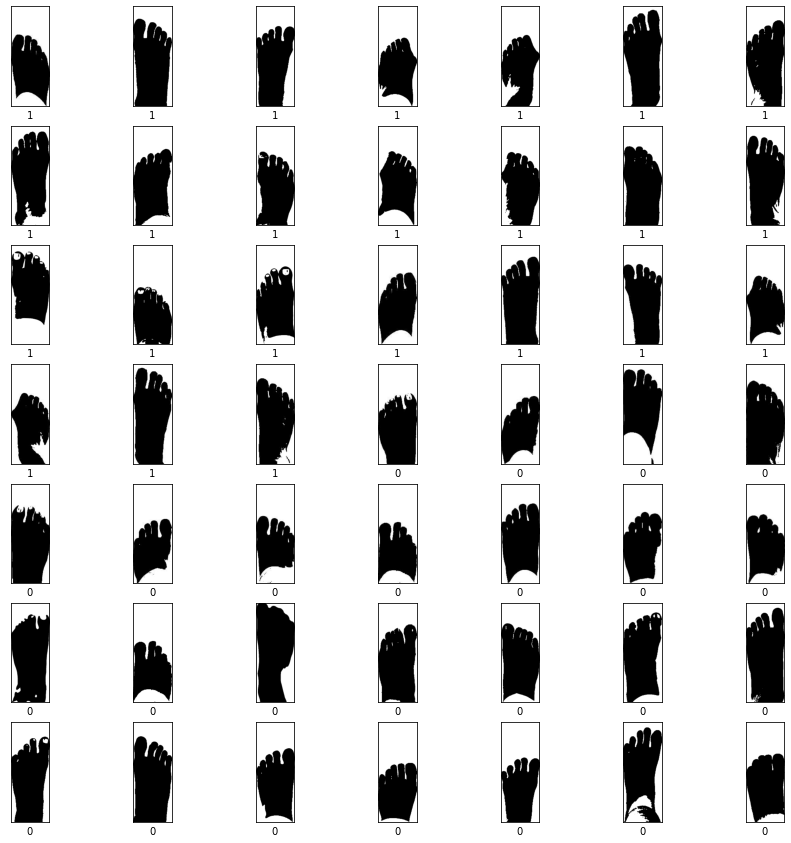

In [1019]:
plt.figure(figsize=(15,15))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(np.array(train_labels)[i])
plt.show()

In [1037]:
inputs=Input(shape=(max_len,100,1))
my_model=final_model(inputs)
# my_model=ResNet34()
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.009),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])

train_labels1=len(yes)*[[0,1]]
train_labels1.extend(len(no)*[[1,0]])
train_labels1=tf.constant(train_labels1)
a=my_model.fit(train_images,train_labels,epochs=55)


Epoch 1/55
4/4 [==============================] - 2s 244ms/step - loss: 0.6744 - accuracy: 0.7353
Epoch 2/55
4/4 [==============================] - 1s 228ms/step - loss: 0.5624 - accuracy: 0.7549
Epoch 3/55
4/4 [==============================] - 1s 214ms/step - loss: 0.5870 - accuracy: 0.7647
Epoch 4/55
4/4 [==============================] - 1s 214ms/step - loss: 0.5058 - accuracy: 0.7647
Epoch 5/55
4/4 [==============================] - 1s 211ms/step - loss: 0.5174 - accuracy: 0.7451
Epoch 6/55
4/4 [==============================] - 1s 212ms/step - loss: 0.5278 - accuracy: 0.7549
Epoch 7/55
4/4 [==============================] - 1s 217ms/step - loss: 0.4849 - accuracy: 0.7647
Epoch 8/55
4/4 [==============================] - 1s 209ms/step - loss: 0.4898 - accuracy: 0.7647
Epoch 9/55
4/4 [==============================] - 1s 215ms/step - loss: 0.5274 - accuracy: 0.7647
Epoch 10/55
4/4 [==============================] - 1s 215ms/step - loss: 0.4540 - accuracy: 0.7647
Epoch 11/55
4/4 [==

In [1038]:
total_yes1=0
for file in os.listdir("./VISION/test yes"):
    img=cv2.imread(f"./VISION/test yes/{file}",0)
    bordersize = max_len-np.shape(img)[0]
    img = cv2.copyMakeBorder(
        img,
        top=bordersize,
        bottom=0,
        left=0,
        right=0,
        borderType=cv2.BORDER_CONSTANT
    )
    pred=np.argmax(my_model.predict([tf.convert_to_tensor([img])]))
    total_yes1+=pred
print("accuracy on yes data=",total_yes1/10)

accuracy on yes data= 0.4


In [1039]:
total_yes2=0
for file in os.listdir("./VISION/test no"):
    img=cv2.imread(f"./VISION/test no/{file}",0)
    bordersize = max_len-np.shape(img)[0]
    img = cv2.copyMakeBorder(
        img,
        top=bordersize,
        bottom=0,
        left=0,
        right=0,
        borderType=cv2.BORDER_CONSTANT
    )
    pred=np.argmax(my_model.predict([tf.convert_to_tensor([img])]))
    total_yes2+=pred
print("accuracy on no data=",(78-total_yes2)/78)
print("accuracy on all test data=",(78-total_yes2+total_yes1)/88)

accuracy on no data= 0.8974358974358975
accuracy on all test data= 0.8409090909090909
